# Image Processing with Matrices
Module 0 | Chapter 2 | Notebook 6

***
Now that you have got to know matrices better, we can look at a more concrete use of matrices: Image processing.
***


When we look at a picture, we see 3 basic colors: Red, green and blue. All other colors are made up of these three. This is because humans have separate color receptors for each of these colors in their eyes. When you import an image with your computer, you can consider each pixel as a separate data point. This data point is described by a vector with 3 values. If we want to edit the colors in the image, we can multiply each pixel vector with a matrix. Let's try that out now. First we'll import a picture. Run the following cell:


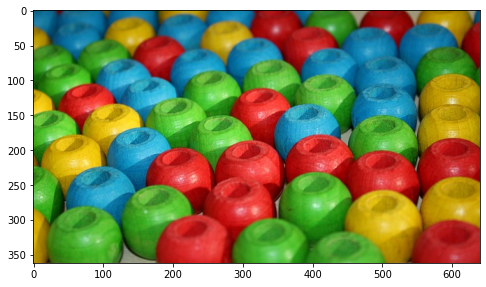

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

arr_img = mpimg.imread('00-02-04-pic3a.png')
fig , ax =plt.subplots(1, figsize=(8,8))
ax.imshow(arr_img)

In the variable `arr_img` there is now an `ndarray`, with three colors for each pixel. These are within a range from 0 to 1. Print the dimensions of `arr_img`.


In [2]:
arr_img.shape

(362, 640, 3)

There are 3 numbers: The number of rows and columns and the depth. The depth is 3. You can imagine that the data is organized in a kind of matrix, with a vector with the color values at each entry. We don't need to reorganize the data to manipulate every pixel, we can continue directly with this data structure. To keep it simple, let's stick to two of the three color directions. Let's look at the colors that are on the red-blue plane. Purple would be a typical color here. It is made up of equal parts red and blue. To make it easier to see what's happening, we'll display it as a vector next to the image. Run the following cell to to see what our test vector `purple` looks like at the beginning. We'll define `purple` and define the function `plot_colors`, which makes it easier to create the images. We just have to pass an image and a vector to this and then get a *figure* and the corresponding *axis* as the output.


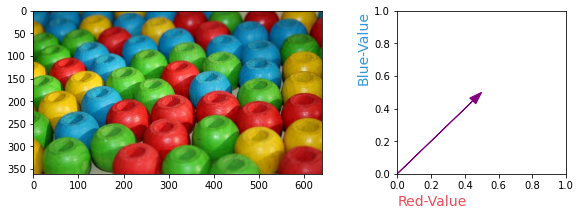

In [8]:
import numpy as np
purple = np.array([0.5,0,0.5])  # maximum value for each color is one

def plot_colors(img, vector):  
    """Plot image and vector as figure with 2 axes. Return the figure and axes.
    
    matplotlib.pyplot has to be imported as plt.
    The vector is assumed to contain rgb-values. The first and third component of the vector will be used as x- and y-values.
    All values of the vector are used for its color. That's why the vector needs to have exactly 3 components.
    The image is simply ploted with imshow.
    
    Args:
        img (ndarray): Array containing an image. Should be created with matplotlib.image.imread().
        vector (ndarray): Array representing a rgb-color-value. Must have 3 components between 0 and 1.

    Returns:
        fig (Figure), axs (ndarray of AxesSubplot) : Two axes inside one figure. Left axis shows img and right axis shows vector.
        
    """
    # clip vector values outside of valid range
    vector = np.clip(vector, 0, 1)
    
    #simple check for common errors:
    if vector.ndim !=1 or img.ndim !=3:
        print('Error: img has to be an array with 3 dimensions. vector should have 1 dimension.')  # print error message
        return None  # return nothing, so that the following code won't be used
    
    fig , axs =plt.subplots(ncols=2, figsize=(10,3), gridspec_kw = {'width_ratios':[2, 1]})  # make two subplots. The first one has double the width.
    axs[0].imshow(img)
    axs[1].set_xlim(0,1)
    axs[1].set_ylim(0,1)
    axs[1].arrow(x=0,y=0, dx=vector[0], dy=vector[2], length_includes_head=True, head_width=0.05, color=vector)  # plot R and B values of vector as arrow with the right color.

    axs[1].set_xlabel(xlabel='Red-Value',
                      position=[0, 0],
                      horizontalalignment='left',
                      color='#e54f59',
                      size=14)
    
    axs[1].set_ylabel(ylabel='Blue-Value',
                      position=[0, 1],
                      horizontalalignment='right',
                      color='#3399db',
                      size=14)
    return fig, axs  # return figure and axis to be able to manipulate afterwards

fig, axs = plot_colors(arr_img, purple)

What happens when we extend our vector?
We'll do the same with the picture. Multiply `arr_img` and `purple` by the value `2`. Use the normal multiplication symbol `*`. Store the result in the variables `arr_img_transformed` and `purple_transformed`.
Then call the `plot_colors()` function with these variables. You can ignore the `Clipping input data ...` warning. It simply states that values that are greater than 1 or less than 0 are set to 1 or 0 respectively.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


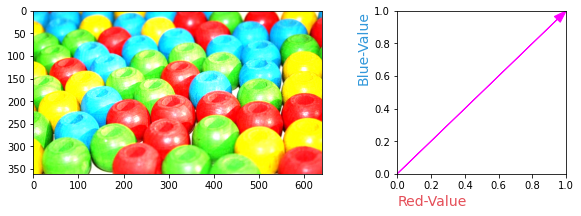

In [9]:
arr_img_transformed  = arr_img * 2
purple_transformed  = purple  * 2
fig, axs = plot_colors(arr_img_transformed, purple_transformed)


As you can see, the purple vector is now longer and much more intense. Also all the colors in the picture have become brighter and more intense. We have increased every color value in the picture. If we only want to make the red and blue values more intense, we have to multiply each pixel vector by an array. For example by `np.array([2,1,2])`. This only doubles the red and blue values.


`numpy` automatically enlarges the new array in such a way that the multiplication of the array with the 3 matching color values works correctly. This is called *broadcasting*. To do this, `numpy` pays attention to the dimensions of the arrays and enlarges the smaller array, so that it fits exactly to the larger one. We will briefly illustrate this in the following cell. We use an array consisting of 2 rows and 3 columns. The rows contain only the 1 or 2. We multiply them element by element by the array `[2,1,2]`. But this array has only one row. This means it is doubled, so to speak, so that it fits the larger array. Run the following cell once.


In [10]:
np.array([[1,1,1],[2,2,2]]) * np.array([2,1,2])

array([[2, 1, 2],
       [4, 2, 4]])

The first and last values of each line were doubled, as we wanted. The following formula shows how you can imagine the calculation:

\begin{equation}
\begin{bmatrix} \color{#3399db}{1} & \color{#3399db}{1} & \color{#3399db}{1} \newline \color{#3399db}{2} & \color{#3399db}{2} & \color{#3399db}{2}  \end{bmatrix} * \begin{bmatrix} \color{#ff9e1c}{2} & \color{#ff9e1c}{1} & \color{#ff9e1c}{2}\end{bmatrix} =
\begin{bmatrix} \color{#3399db}{1} & \color{#3399db}{1} & \color{#3399db}{1} \newline \color{#3399db}{2} & \color{#3399db}{2} & \color{#3399db}{2}  \end{bmatrix} * \begin{bmatrix} \color{#ff9e1c}{2} & \color{#ff9e1c}{1} & \color{#ff9e1c}{2} \newline \color{#ff9e1c}{2} & \color{#ff9e1c}{1} & \color{#ff9e1c}{2}\end{bmatrix} =
\begin{bmatrix} \color{#3399db}{1} \cdot \color{#ff9e1c}{2} & \color{#3399db}{1} \cdot \color{#ff9e1c}{1} & \color{#3399db}{1} \cdot \color{#ff9e1c}{2} \newline \color{#3399db}{2} \cdot \color{#ff9e1c}{2} & \color{#3399db}{2} \cdot \color{#ff9e1c}{1} & \color{#3399db}{2} \cdot \color{#ff9e1c}{2} \end{bmatrix} = \begin{bmatrix} 2 & 1 & 2 \newline 4 & 2 & 4 \end{bmatrix}
\end{equation}

If you are interested in *broadcasting* in `numpy`, then take a look at the [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).


Now let's return to image processing. Multiply `arr_img` and `purple` by `np.array([2,1,2])` to double only the red and blue values. Store the results again in `arr_img_transformed` and `purple_transformed`. Pass them to `plot_colors` and visualize the result.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


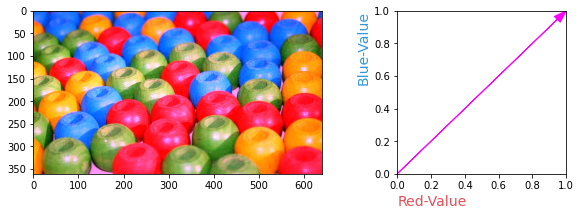

In [11]:
arr_img_transformed =  arr_img * np.array([2,1,2])
purple_transformed = purple  * np.array([2,1,2])
fig, axs = plot_colors(arr_img_transformed, purple_transformed)

The purple vector looks the same as before. So blue and red have been doubled again. We can see this well in the picture looking at color yellow. Yellow is made up of green and red. By increasing the red, yellow becomes orange.


Finally, let's have a look at what happens when we rotate our vectors in the red-blue plane. To do this, we have to multiply it by a matrix that does this.
In the following code cell we'll define this matrix and call it `mat_rot`. It depends on the angle `degree`. You do not need to understand the matrix definition in detail.

For `degree` you can basically set any value. Keep in mind that the values of vectors that are rotated out of the value range are reduced so that they fit in again. We recommend that you try the  value first. In the next step, we multiply the matrix with the image and the purple vector and see what happens. Run the following cell. At the end of it, the matrix is applied to the vector `[1,0,0]` as a matrix multiplication. Since we set the angle to 90°, the first value (red) is rotated completely to the third value (blue). Thus, `[1,0,0]` becomes `[0,0,1]`.


In [26]:
degree = 90  # define the angle of rotation in degrees

# define the matrix for rotation around the second axis
mat_rot = np.array([
    [np.cos(np.deg2rad(degree)), 0, np.sin(np.deg2rad(degree))],
    [0, 1, 0],
    [-np.sin(np.deg2rad(degree)), 0, np.cos(np.deg2rad(degree))]])
print(mat_rot)
#test matrix on simple array
np.dot(mat_rot,np.array([1,0,0]))

[[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]


array([ 6.123234e-17,  0.000000e+00, -1.000000e+00])

So the rotation matrix works quite well. For a matrix multiplication, you always have to pass the matrix first. So it comes to the left of the vector. Run the following cell to set the rotation angle to 25°.


In [27]:
degree = 25  # define the angle of rotation in degrees

# define the matrix for rotation around the second axis
mat_rot = np.array([
            [np.cos(np.deg2rad(degree)), 0, np.sin(np.deg2rad(degree))],
            [0, 1, 0],
            [-np.sin(np.deg2rad(degree)), 0, np.cos(np.deg2rad(degree))]]) 

Now we want to apply the matrix to each pixel vector of the image. Our picture has the shape `(362, 640, 3)` so there are 362 * 640 pixels. We will use two nested `for` loops to access each pixel. We'll put the transformed pixels into `arr_image_transformed` one by one, going through the image pixel by pixel. Run the following cell to do this.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


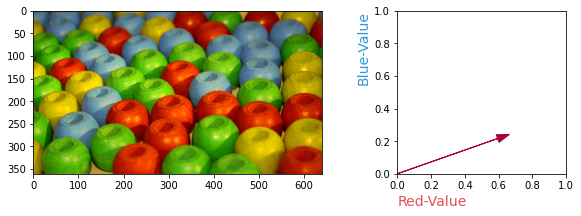

In [28]:
purple_transformed = np.dot(mat_rot, purple)  # rotate purple

#rotate every pixel in the image
for row in range(arr_img.shape[0]):
    for column in range(arr_img.shape[1]):
        vec_pixel = arr_img[row, column, :]  # select the 3 pixel values
        arr_img_transformed[row, column, :] = np.dot(mat_rot, vec_pixel)  # rotate the pixel vector and save it

#show the new plot
fig, axs = plot_colors(arr_img_transformed, purple_transformed)

If you compare the picture with the original picture, you'll see that the color of the blue balls is not as intense any more. Instead, the reds are more intense. This is because we rotated the colors away from blue to red. The green balls have hardly been influenced by this. This is because green lies on a different axis, which we didn't change.
Because we associate red with warmth and blue with coldness, the entire image appears warmer. This way you could apply a filter to photos, which makes the images warmer or cooler by rotating the vectors.


If you enjoy manipulating images in this way, you can use the following code cell to experiment a little. Beside the picture with the wooden balls, you can also import the images *00-02-04-pic3b.png* and *00-02-04-pic3c.png* and see how transforming the pixel vectors affect them.


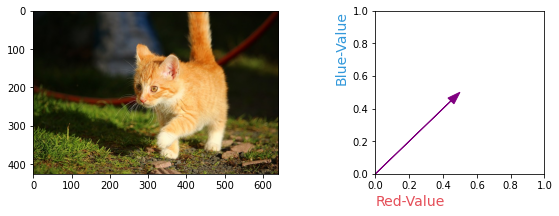

In [29]:
# define degree and rotation matrix
degree = 0
mat_rot = np.array([
            [np.cos(np.deg2rad(degree)), 0, np.sin(np.deg2rad(degree))],
            [0, 1, 0],
            [-np.sin(np.deg2rad(degree)), 0, np.cos(np.deg2rad(degree))]
                ])

#read the new image
arr_img = mpimg.imread('00-02-04-pic3b.png')
#rotate purple
purple_transformed = np.dot(mat_rot, purple)
#rotate every pixel in the image
for row in range(arr_img.shape[0]):
    for column in range(arr_img.shape[1]):
        vec_pixel = arr_img[row, column, :]  # select the 3 pixel values
        arr_img[row, column, :] = np.dot(mat_rot, vec_pixel)  # rotate the pixel vector and save it
#show the new plot
fig, axs = plot_colors(arr_img, purple_transformed)

**Congratulations:** You have now seen how colors can be displayed as vectors. By transforming the vectors, you can manipulate photos, for example. This is an illustrative case of how we can efficiently use linear algebra methods to efficiently modify data points. This can play a role especially in data preparation. In the next module, you will get to know methods that use matrix multiplication to simplify the data.


**Remember:**
* Images are stored in objects similar to matrices
* Many image processing tasks can be formulated as matrix or vector manipulation


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
